# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [77]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [78]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

text = []
rating =[]
air_craft=[]
Type_Of_Traveller=[]
Seat_Type =[]
Route=[]
Date_Flown=[]
seat_comfort =[]
Cabin_Staff_Service =[]
Food_Beverages =[]
Inflight_Entertainment=[]
Ground_Service =[]
Value_For_Money =[]
Recommended=[]
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "body"}):
        text.append(para.find("div", {"class": "text_content"}).get_text())
        for row in para.find_all("tr"):
            if row.find("td", {"class": "review-rating-header aircraft"}) != None:
                air_craft.append(row.find("td",{"class": "review-value"}).get_text())
            if row.find("td", {"class": "review-rating-header type_of_traveller"}):
                Type_Of_Traveller.append(row.find("td",{"class": "review-value"}).get_text())
            if row.find("td", {"class": "review-rating-header cabin_flown"}):
                Seat_Type.append(row.find("td",{"class": "review-value"}).get_text())
            if row.find("td", {"class": "review-rating-header route"}):
                Route.append(row.find("td",{"class": "review-value"}).get_text())
            if row.find("td", {"class": "review-rating-header date_flown"}):
                Date_Flown.append(row.find("td",{"class": "review-value"}).get_text())
            if row.find("td", {"class": "review-rating-header seat_comfort"}):
                seat_comfort.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header cabin_staff_service"}):
                Cabin_Staff_Service.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header food_and_beverages"}):
                Food_Beverages.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header inflight_entertainment"}):
                Inflight_Entertainment.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header ground_service"}):
                Ground_Service.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header value_for_money"}):
                Value_For_Money.append(len(row.find_all("span",{"class": "star fill"})))
            if row.find("td", {"class": "review-rating-header recommended"}) != None:
                Recommended.append(row.find("td",{"class": "review-value"}).get_text())   
    # Tìm độ dài lớn nhất
        max_length = max(
                len(air_craft),
                len(Type_Of_Traveller),
                len(Seat_Type),
                len(Route),
                len(Date_Flown),
                len(seat_comfort),
                len(Cabin_Staff_Service),
                len(Food_Beverages),
                len(Inflight_Entertainment),
                len(Ground_Service),
                len(Value_For_Money),
                len(Recommended)
        )
        air_craft += [np.nan] * (max_length - len(air_craft))
        Type_Of_Traveller += [np.nan] * (max_length - len(Type_Of_Traveller))
        Seat_Type += [np.nan] * (max_length - len(Seat_Type))
        Route += [np.nan] * (max_length - len(Route))
        Date_Flown += [np.nan] * (max_length - len(Date_Flown))
        seat_comfort += [np.nan] * (max_length - len(seat_comfort))
        Cabin_Staff_Service += [np.nan] * (max_length - len(Cabin_Staff_Service))
        Food_Beverages += [np.nan] * (max_length - len(Food_Beverages))
        Inflight_Entertainment += [np.nan] * (max_length - len(Inflight_Entertainment))
        Ground_Service += [np.nan] * (max_length - len(Ground_Service))
        Value_For_Money += [np.nan] * (max_length - len(Value_For_Money))
        Recommended += [np.nan] * (max_length - len(Recommended))

    a=1
    for para in parsed_content.find_all("div", {"class": "rating-10"}):
        if a!=1:
            rating.append(para.get_text())
        else:
            a=0
    print(f"   ---> {len(rating)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3


In [ ]:
data = {
    "rating": rating,
    "reviews": text,
    "air_craft": air_craft,
    "Type_Of_Traveller": Type_Of_Traveller,
    "Seat_Type": Seat_Type,
    "Route": Route,
    "Date_Flown": Date_Flown,
    "seat_comfort": seat_comfort,
    "Cabin_Staff_Service": Cabin_Staff_Service,
    "Food_Beverages": Food_Beverages,
    "Inflight_Entertainment": Inflight_Entertainment,
    "Ground_Service": Ground_Service,
    "Value_For_Money": Value_For_Money,
    "Recommended": Recommended
}
df = pd.DataFrame(data)
df.head()

,rating,reviews,air_craft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,seat_comfort,Cabin_Staff_Service,Food_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended
0,\n4/10\n,Not Verified | BA is not treating its premium ...,Boeing 777 -200,Family Leisure,Premium Economy,Kingston to London,June 2023,5.0,4.0,4.0,3.0,3.0,3,no
1,\n1/10\n,✅ Trip Verified | 24 hours before our departu...,Boeing 777-200,Couple Leisure,Economy Class,London Heathrow to Cape Town,June 2023,1.0,3.0,1.0,3.0,3.0,2,no
2,\n1/10\n,✅ Trip Verified | We arrived at Heathrow at 0...,NaN,Couple Leisure,Economy Class,London Heathrow to Ibiza,July 2023,NaN,NaN,NaN,NaN,1.0,1,no
3,\n3/10\n,✅ Trip Verified | Original flight was cancell...,A380,Business,Business Class,Washington to London,June 2023,3.0,3.0,3.0,3.0,1.0,1,no
4,\n3/10\n,Not Verified | Airport check in was functiona...,A321,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,1.0,4.0,1.0,NaN,2.0,2,no


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df['rating']=df['rating'].str.strip()
df["rating"]=df['rating'].str.replace("/10","")
df[["verified","reviews"]] = df["reviews"].str.split("|",expand=True)
df["verified"] = df["verified"].str.replace("✅","")
df["verified"] = df["verified"].str.replace("❎","")
df['verified']=df['verified'].str.strip()
df.drop(columns="air_craft",inplace=True)
df.head()

,rating,reviews,Type_Of_Traveller,Seat_Type,Route,Date_Flown,seat_comfort,Cabin_Staff_Service,Food_Beverages,Inflight_Entertainment,Ground_Service,Value_For_Money,Recommended,verified
0,4,BA is not treating its premium economy passen...,Family Leisure,Premium Economy,Kingston to London,June 2023,5.0,4.0,4.0,3.0,3.0,3,no,Not Verified
1,1,24 hours before our departure on BA059 to Ca...,Couple Leisure,Economy Class,London Heathrow to Cape Town,June 2023,1.0,3.0,1.0,3.0,3.0,2,no,Trip Verified
2,1,We arrived at Heathrow at 0600 to find our f...,Couple Leisure,Economy Class,London Heathrow to Ibiza,July 2023,NaN,NaN,NaN,NaN,1.0,1,no,Trip Verified
3,3,Original flight was cancelled with no explan...,Business,Business Class,Washington to London,June 2023,3.0,3.0,3.0,3.0,1.0,1,no,Trip Verified
4,3,Airport check in was functionary with little...,Couple Leisure,Economy Class,London Heathrow to Naples,June 2023,1.0,4.0,1.0,NaN,2.0,2,no,Not Verified


In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

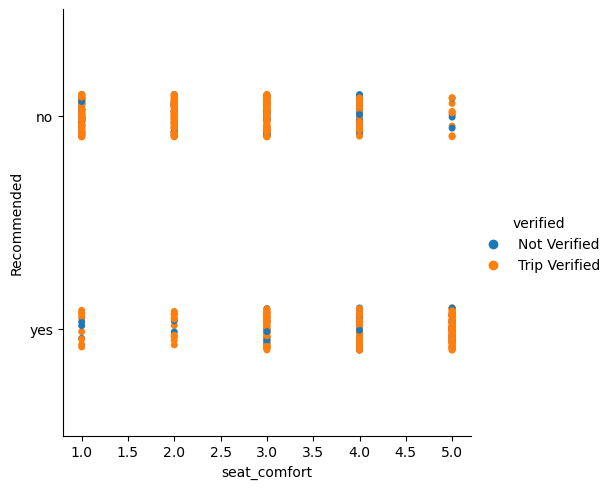

In [ ]:
sns.catplot(data=df,x="seat_comfort",y="Recommended",hue="verified")

Text(0.5, 1.0, 'seat_comfort & Recommended')

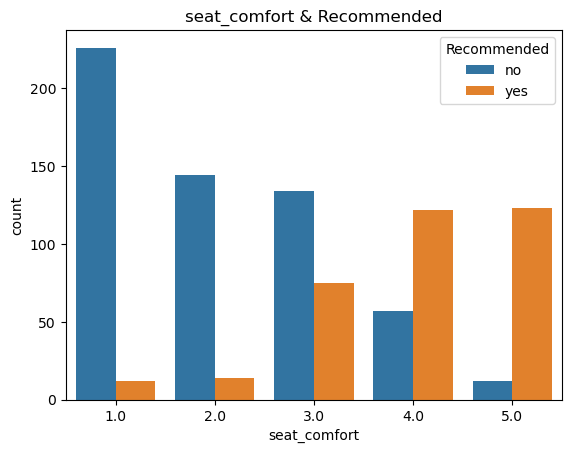

In [ ]:
sns.countplot(data=df,x="seat_comfort",hue="Recommended")
plt.title("seat_comfort & Recommended")

Text(0.5, 0.98, 'Rating & Recommended')

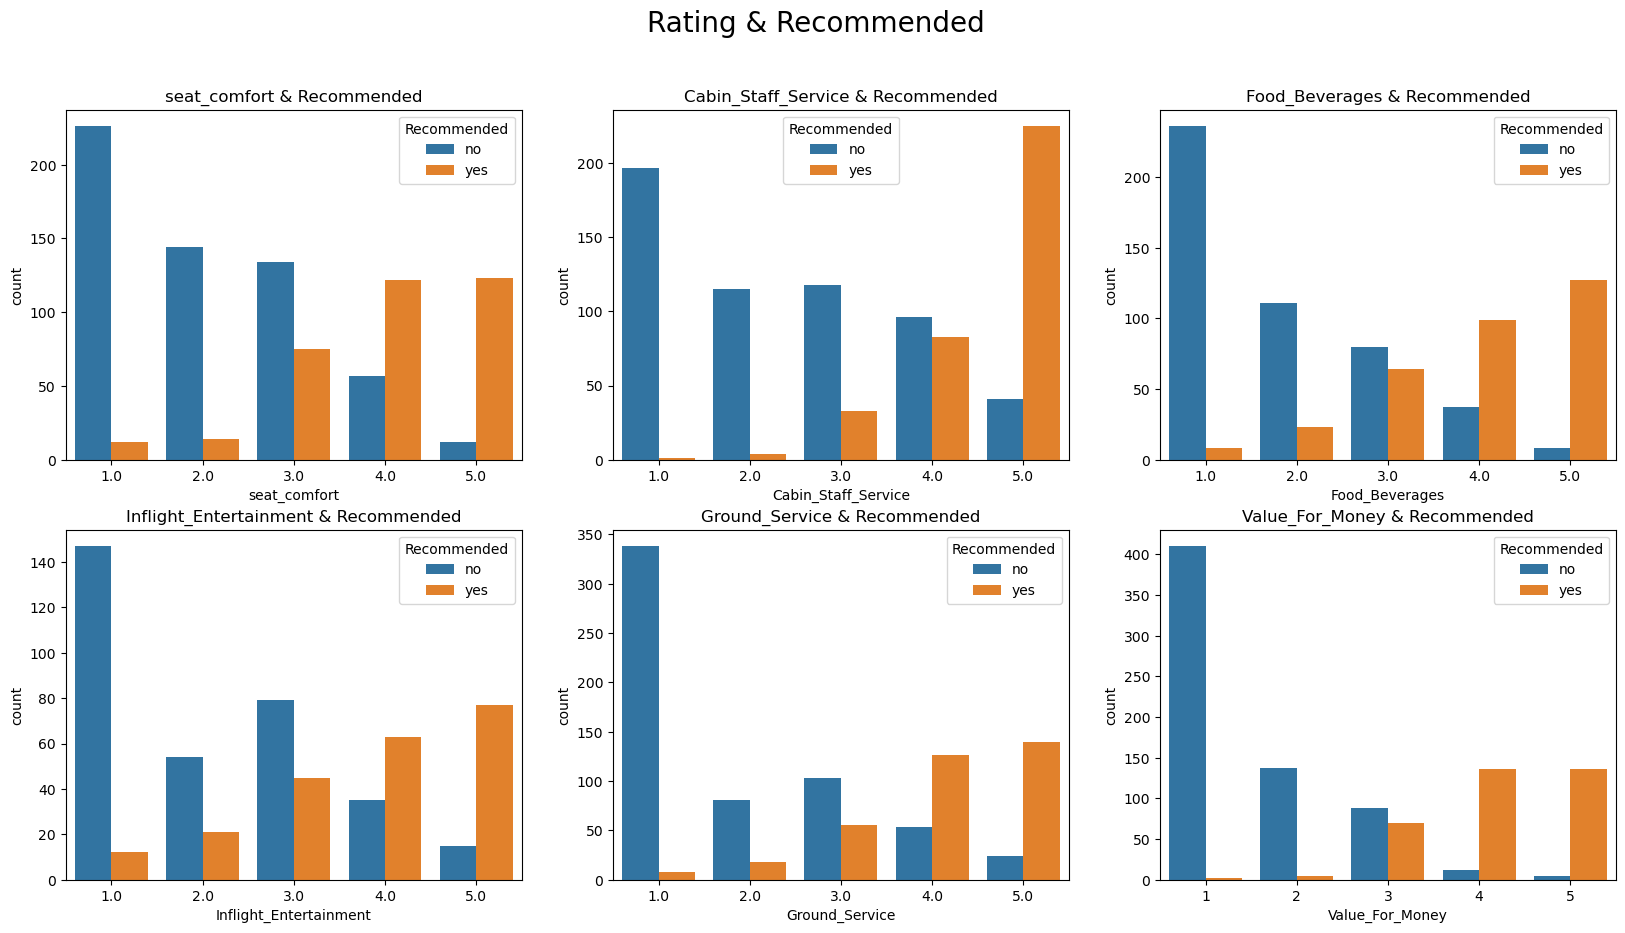

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(data=df,x="seat_comfort",hue="Recommended")
plt.title("seat_comfort & Recommended")
plt.subplot(2,3,2)
sns.countplot(data=df,x="Cabin_Staff_Service",hue="Recommended")
plt.title("Cabin_Staff_Service & Recommended")
plt.subplot(2,3,3)
sns.countplot(data=df,x="Food_Beverages",hue="Recommended")
plt.title("Food_Beverages & Recommended")
plt.subplot(2,3,4)
sns.countplot(data=df,x="Inflight_Entertainment",hue="Recommended")
plt.title("Inflight_Entertainment & Recommended")
plt.subplot(2,3,5)
sns.countplot(data=df,x="Ground_Service",hue="Recommended")
plt.title("Ground_Service & Recommended")
plt.subplot(2,3,6)
sns.countplot(data=df,x="Value_For_Money",hue="Recommended")
plt.title("Value_For_Money & Recommended")
plt.suptitle("Rating & Recommended",fontsize=20)

In [ ]:
from wordcloud import WordCloud

In [ ]:

concatenated_string = df['reviews'].str.cat(sep=' ')
wordcloud = WordCloud().generate(concatenated_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



apple banana orange
